In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as p
import os

Using TensorFlow backend.


In [2]:
def load_images(image_paths):
    # Load the images from disk.
    images = [p.imread(path) for path in image_paths]

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [3]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

In [4]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = p.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    p.show()

In [5]:
import PIL

In [6]:
def predict(image_path):
    # Load and resize the image using PIL.
    img = image.load_img(image_path,target_size=(64,64))
   
    # Plot the image.
    p.imshow(img)
    p.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(image.img_to_array(img), axis=0)

    pred = model.predict(img_array)
    print(pred) 
    
    n=59#number of classes 
    y=0
    for x in range(n):
        if (y<pred[0][x]):
                y=pred[0][x]
                z=x# helps to get the index
    label=generator_test.class_indices 
    for key in label.keys():
        if(label[key]==z):
            print(key)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

datagen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [8]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = 'Ranjana/train/'
test_dir = 'Ranjana/test/'

In [10]:
batch_size = 12
input_shape=(64,64)
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

Found 472 images belonging to 59 classes.


In [11]:
generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 472 images belonging to 59 classes.


In [12]:
epochs = 3
steps_per_epoch = 40
steps_test = 8
steps_test

8

In [13]:
image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

In [14]:
cls_train = generator_train.classes
cls_test = generator_test.classes

In [15]:
class_names = list(generator_train.class_indices.keys())

In [16]:
# num_classes = generator_train.num_classes
num_classes = 59

C:\Users\SRK\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SRK\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0, flags=flags)


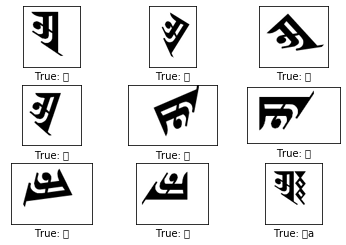

In [17]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[0:9])

# Get the true classes for those images.
cls_true = cls_train[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [18]:
model=Sequential()
#flatten converts (64,64,3)----> 64*64*3 ie 12288
model.add(Flatten(input_shape=(64,64,3)))# 3 refers 3 channels i.e. R,G,B
model.add(Dense(32,activation='relu'))

In [19]:
model.add(Dense(59,activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(generator_train,   epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

Epoch 1/3
40/40 [==============================] - 2s 51ms/step - loss: 5.1337 - accuracy: 0.0042 - val_loss: 4.0749 - val_accuracy: 0.0000e+00
Epoch 2/3
40/40 [==============================] - 2s 38ms/step - loss: 4.0787 - accuracy: 0.0064 - val_loss: 4.0789 - val_accuracy: 0.0000e+00
Epoch 3/3
40/40 [==============================] - 1s 36ms/step - loss: 4.0787 - accuracy: 0.0064 - val_loss: 4.0754 - val_accuracy: 0.0000e+00


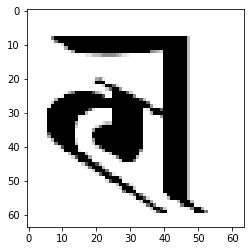

[[0.01695194 0.01693731 0.01679369 0.01699613 0.01704186 0.01698002
  0.01696039 0.01701317 0.01696182 0.01689641 0.01696107 0.01698679
  0.01694365 0.01694332 0.01700786 0.01686439 0.01694017 0.01696945
  0.01696109 0.01705213 0.01703062 0.01680427 0.01683972 0.01696133
  0.01689192 0.01702694 0.01698754 0.01689906 0.01698261 0.01695164
  0.01698782 0.01696202 0.01687071 0.01692695 0.01692383 0.01701507
  0.01693987 0.01705131 0.01690929 0.01691519 0.01699998 0.01701518
  0.01683585 0.01710457 0.01684659 0.0170464  0.01702012 0.01695263
  0.01685113 0.01689327 0.01683081 0.01698474 0.01686695 0.01698965
  0.01696665 0.01688307 0.01685571 0.01700487 0.01701147]]
व


In [22]:
predict(image_path=train_dir+"/ल/1.jpg")